# House grouping system - California

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# 1. Upload the data collection and clean the dataframe

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
new_df = X = total_data[["MedInc", "Latitude", "Longitude"]]
new_df.head(5)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [ ]:
#Separamos en datos de entrenamiento y prueba
X_train, X_test = train_test_split(new_df, test_size = 0.2, random_state = 42)
X_train.head(5)

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


# 2. K-Means model

In [ ]:
#Entrenamos el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [ ]:
#Incluimos los clusters en una nueva columna
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head(5)

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


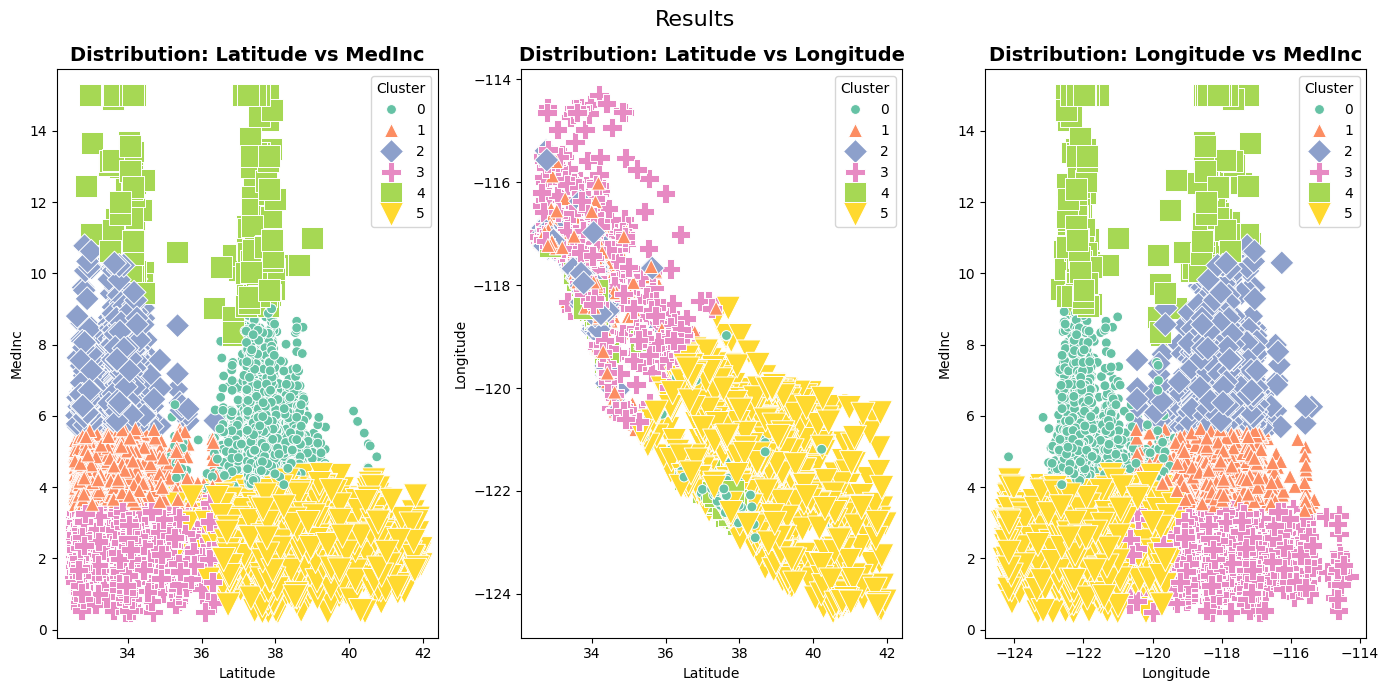

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (14, 7))
fig.suptitle("Results", fontsize=16)

markers = {0: "o", 1: "^", 2: "D", 3: "P", 4: "s", 5: "v"}
sizes = {0: 50, 1: 100, 2: 150, 3: 200, 4: 250, 5: 300}

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "Set2", 
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "Set2", 
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "Set2", 
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)

axis[0].set_title("Distribution: Latitude vs MedInc", fontsize=14, fontweight='bold')
axis[1].set_title("Distribution: Latitude vs Longitude", fontsize=14, fontweight='bold')
axis[2].set_title("Distribution: Longitude vs MedInc", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Test data prediction

In [28]:
y_test = list(model.predict(X_test))
X_test["Cluster"] = y_test
X_test.head(5)

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


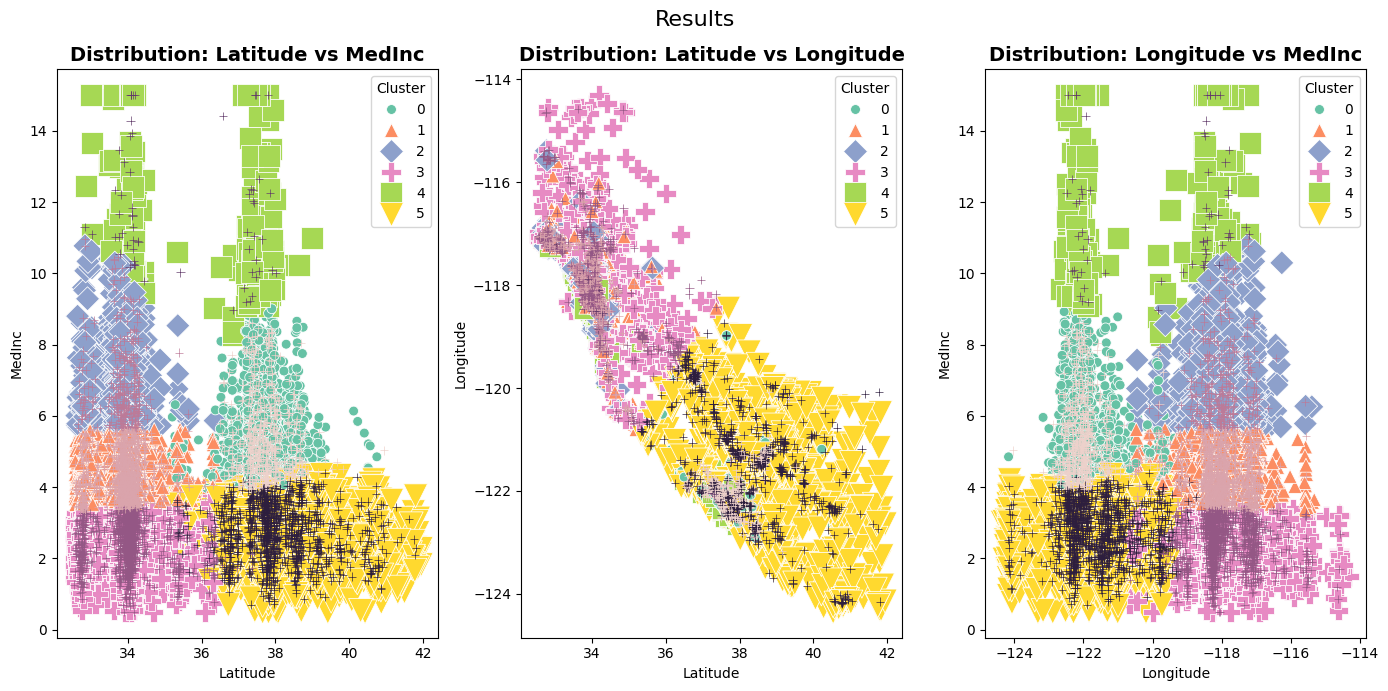

In [44]:
fig, axis = plt.subplots(1, 3, figsize = (14, 7))
fig.suptitle("Results", fontsize=16)

markers = {0: "o", 1: "^", 2: "D", 3: "P", 4: "s", 5: "v"}
sizes = {0: 50, 1: 100, 2: 150, 3: 200, 4: 250, 5: 300}

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "Set2",
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "Set2",
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "Set2",
                style = "Cluster", markers=markers, size="Cluster", sizes=sizes, legend="full")

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", color = "black",
                marker = "+", legend=False)
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", color = "black",
                marker = "+", legend=False)
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", color = "black",
                marker = "+", legend=False)

axis[0].set_title("Distribution: Latitude vs MedInc", fontsize=14, fontweight='bold')
axis[1].set_title("Distribution: Latitude vs Longitude", fontsize=14, fontweight='bold')
axis[2].set_title("Distribution: Longitude vs MedInc", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Training the unsupervised clasification model

Between all the algorithms we've studied, I have decided to choose the Decision Tree. The main reason why was that there isn't any linear relation between all the existing variables. Moreover, it's a nice way to visualize everything, plus the lack of normalization and scalation of the data.

# Decision Tree

In [45]:
model_DT = DecisionTreeClassifier(random_state = 42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
tree_rules = export_text(model_DT, feature_names = list(X_train.columns))
print(tree_rules)

|--- Cluster <= 4.50
|   |--- MedInc <= 3.39
|   |   |--- Cluster <= 2.00
|   |   |   |--- class: 1
|   |   |--- Cluster >  2.00
|   |   |   |--- class: 3
|   |--- MedInc >  3.39
|   |   |--- Cluster <= 0.50
|   |   |   |--- class: 0
|   |   |--- Cluster >  0.50
|   |   |   |--- Cluster <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Cluster >  1.50
|   |   |   |   |--- Cluster <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Cluster >  2.50
|   |   |   |   |   |--- Cluster <= 3.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- Cluster >  3.50
|   |   |   |   |   |   |--- class: 4
|--- Cluster >  4.50
|   |--- class: 5



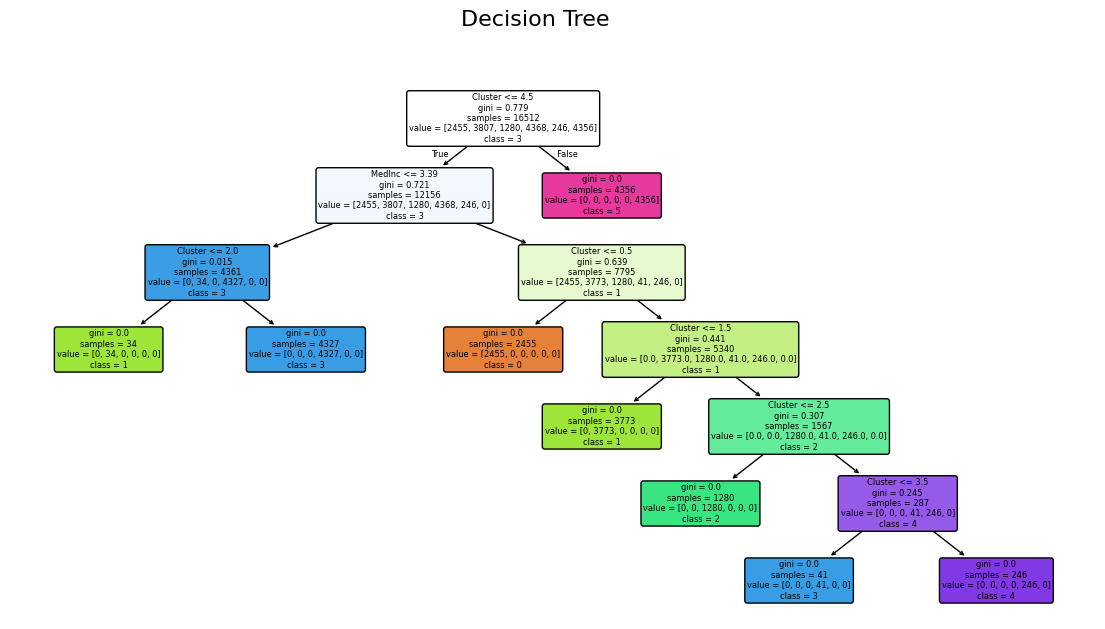

In [54]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle("Decision Tree", fontsize=16)

plot_tree(
    model_DT, 
    feature_names = list(X_train.columns), 
    class_names = ["0", "1", "2", "3", "4", "5"], 
    filled = True, 
    rounded = True)

plt.show()

In [56]:
y_pred = model_DT.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [57]:
accuracy_score(y_test, y_pred)

1.0

In [59]:
dump(model, open("../models/k-means_default_42.sav", "wb"))
dump(model_DT, open("../models/decision_tree_classifier_default_42.sav", "wb"))